<a href="https://colab.research.google.com/github/yilewang/TVB_Demo/blob/master/sim2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install tvb-library
%pylab inline
import os
from tvb.simulator.lab import *
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose, ReducedSetBase
import matplotlib.pyplot as plt
import numpy as np


In [2]:
%%capture
path = "C:/Users/wayne/tvb/tvbdemos/tvb_slurm/0306A.zip"

In [3]:
speed=10.
oscillator = models.ReducedSetHindmarshRose()
ReducedSetBase.number_of_modes = 1
white_matter = connectivity.Connectivity.from_file(path)
oscillator.variables_of_interest = ["xi"]
white_matter.speed = np.array([speed])
white_matter_coupling = coupling.Linear(a=np.array([0.04]))
heunint = integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0, random_stream=np.random.RandomState(seed=42)))
# Initialise some Monitors with period in physical time
mon_raw = monitors.Raw()
mon_tavg = monitors.TemporalAverage(period=1.)
what_to_watch = (mon_tavg, mon_raw)
# Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                        coupling=white_matter_coupling,
                        integrator=heunint, monitors=what_to_watch, simulation_length=1e3)
sim.configure()

,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: c03a0c92-60db-49db-be9a-a83835aff1ae
coupling,Linear gid: d79983e9-512a-49a2-869d-2083c3fd363c
gid,UUID('9ee618c1-540c-4c6f-be31-2f36329f680f')
initial_conditions,None
integrator,HeunStochastic gid: 551d9edc-eba3-43ab-b0f6-57d0318abc74
model,ReducedSetHindmarshRose gid: a0329d24-897d-4d25-a4f2-2f38b895a0c0
monitors,"(, )"
simulation_length,1000.0


In [4]:
(tavg_time, tavg_data), (raw_time, raw_data) = sim.run()

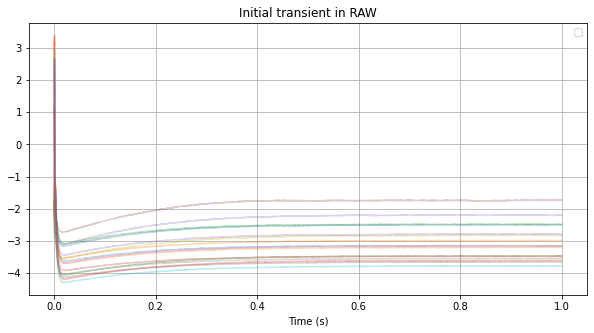

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(raw_time * 1e-3, raw_data[:, 0, :, 0], alpha=0.3)
plt.title('Initial transient in RAW')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()